In [2]:
import matplotlib.pyplot as plt 
import pickle
from tensorflow.python.keras.models import load_model

model = load_model('/home/ye/zhouhua/models/FCN-dataset1-keras.model')

pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle", "rb")
y_test = pickle.load(pickle_in)

In [4]:
print(X_test.shape, y_test.shape)

(56, 224, 224, 3) (56, 224, 224, 10)


In [8]:
import numpy as np
y_pred = model.predict(X_test)
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y_test, axis=3)
print(y_predi.shape, y_testi.shape)

(56, 224, 224) (56, 224, 224)


In [9]:
def IoU(Yi,y_predi):
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)

    IoUs = []
    Nclass = int(np.max(Yi)) + 1
    for c in range(Nclass):
        TP = np.sum( (Yi == c)&(y_predi==c) )
        FP = np.sum( (Yi != c)&(y_predi==c) )
        FN = np.sum( (Yi == c)&(y_predi != c)) 
        IoU = TP/float(TP + FP + FN)
        print("class {:02.0f}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f}, IoU={:4.3f}".format(c,TP,FP,FN,IoU))
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    print("_________________")
    print("Mean IoU: {:4.3f}".format(mIoU))
    
IoU(y_testi,y_predict)

class 00: #TP=400755, #FP= 51939, #FN=104471, IoU=0.719
class 01: #TP=695345, #FP= 77190, #FN=63247, IoU=0.832
class 02: #TP=    17, #FP=   119, #FN=34681, IoU=0.000
class 03: #TP=865313, #FP= 60423, #FN=22013, IoU=0.913
class 04: #TP=116287, #FP= 39085, #FN=39217, IoU=0.598
class 05: #TP=205036, #FP= 67602, #FN=24252, IoU=0.691
class 06: #TP=  5805, #FP=  3413, #FN=40184, IoU=0.118
class 07: #TP= 20771, #FP= 24030, #FN=16121, IoU=0.341
class 08: #TP=120459, #FP= 51274, #FN=16030, IoU=0.642
class 09: #TP=  1115, #FP=  3878, #FN=18737, IoU=0.047
_________________
Mean IoU: 0.490


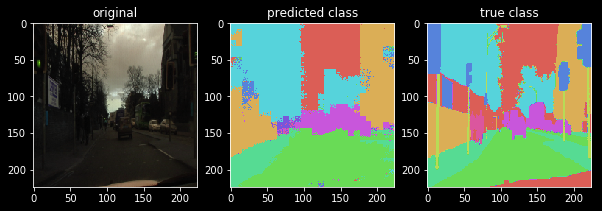

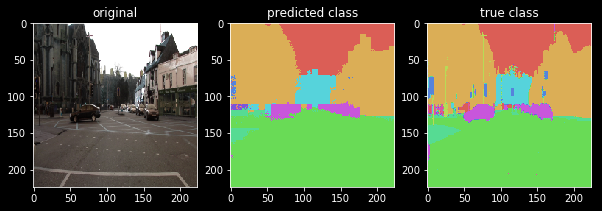

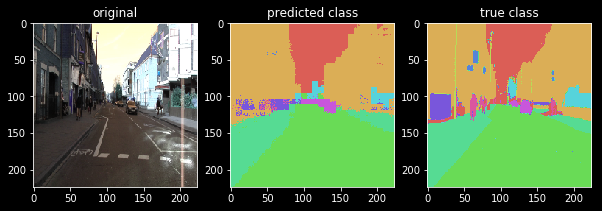

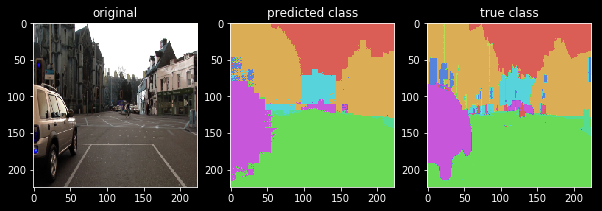

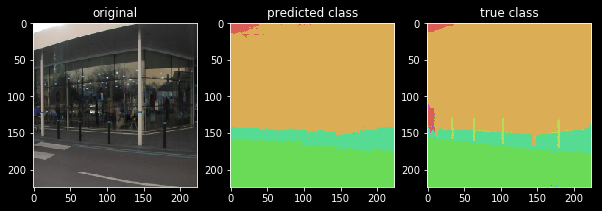

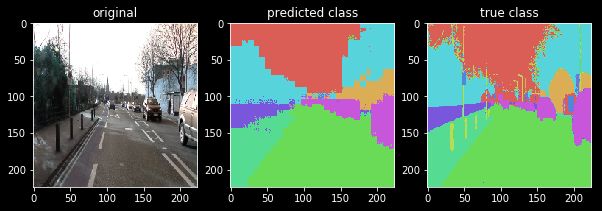

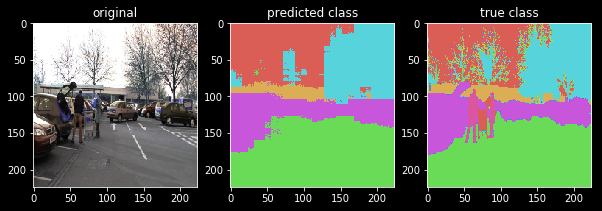

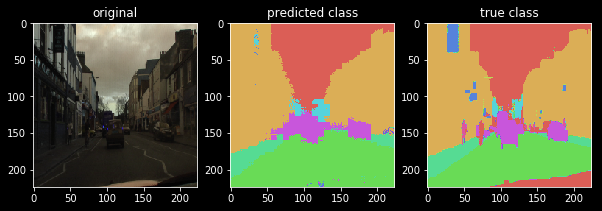

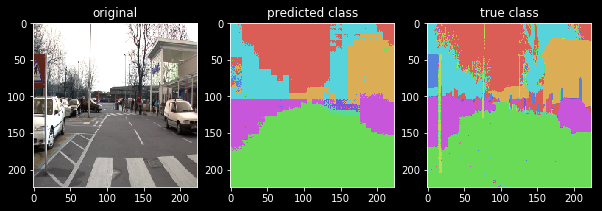

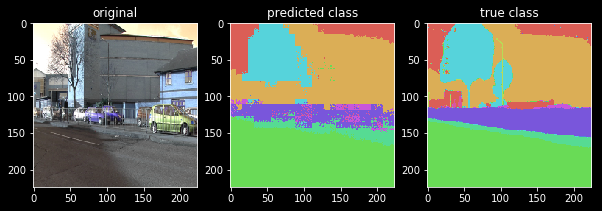

In [12]:
import seaborn as sns
import random
def give_color_to_seg_img(seg,n_classes):
    '''
    seg : (input_width,input_height,3)
    '''
    
    if len(seg.shape)==3:
        seg = seg[:,:,0]
    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3) ).astype('float')
    colors = sns.color_palette("hls", n_classes)
    
    for c in range(n_classes):
        segc = (seg == c)
        seg_img[:,:,0] += (segc*( colors[c][0] ))
        seg_img[:,:,1] += (segc*( colors[c][1] ))
        seg_img[:,:,2] += (segc*( colors[c][2] ))

    return(seg_img)
shape = (224,224)
n_classes= 10

for i in range(10):
    img_is  = (X_test[i] + 1)*(255.0/2)
    seg = y_predi[i]
    segtest = y_testi[i]

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_is/255.0)
    ax.set_title("original")
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(give_color_to_seg_img(seg,n_classes))
    ax.set_title("predicted class")
    
    ax = fig.add_subplot(1,3,3)
    ax.imshow(give_color_to_seg_img(segtest,n_classes))
    ax.set_title("true class")
    plt.show()